# Problame Statement
- 1) Delivery_time -> Predict delivery time using sorting time 
2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data set folder/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.shape

(21, 2)

In [ ]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

**Oservation** > Their is no NA values present in dataset

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

**Observation** > Their is no dublicates veriabels present in dataset

In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Observation** > The average of Delivery_Time is '16.79' and average of Sorting_time is'6.19'

# Visualizing the data 

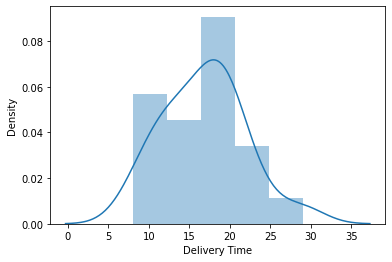

In [ ]:
sns.distplot(df["Delivery Time"])

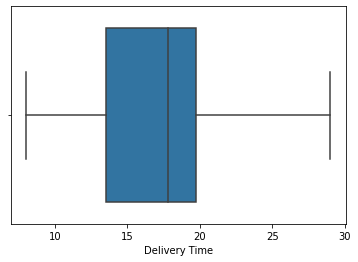

In [ ]:
# Finding Outliers
sns.boxplot(df["Delivery Time"])

**Observation** > Most of the data points foles near to 18 and their is no outlier present

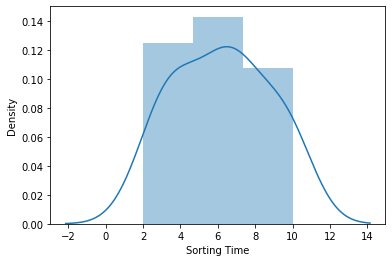

In [ ]:
sns.distplot(df['Sorting Time'])

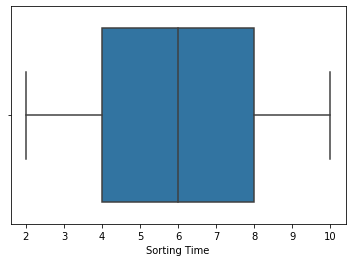

In [ ]:
sns.boxplot(df['Sorting Time'])

**Observation** > Most of the data points foles between "4.5 to 7.5" approx and data is positively skwed. And their is no outlier present in dataset.

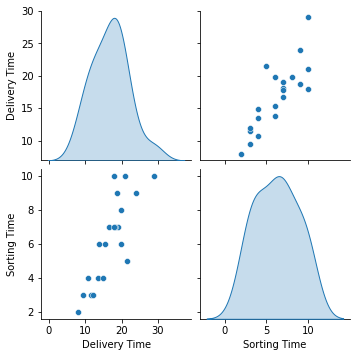

In [ ]:
#Pairring the data
sns.pairplot(df, diag_kind='kde')

# Finding the relationship between to vareables

## Correlation

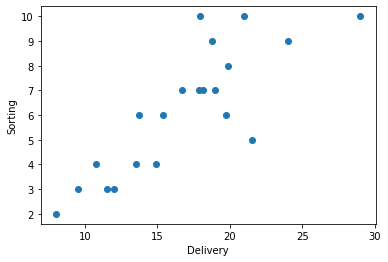

In [ ]:
plt.scatter(df['Delivery Time'], df['Sorting Time'])
plt.xlabel('Delivery')
plt.ylabel('Sorting')
plt.show()

In [ ]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


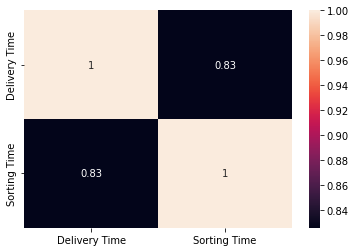

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Observation** > We can say that Sorting Time is positively co-related with Delivery Time

In [ ]:
df.rename(columns={"Delivery Time": "dt","Sorting Time":"st"},inplace = True)

# Building the Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols("dt~st",data = df).fit()


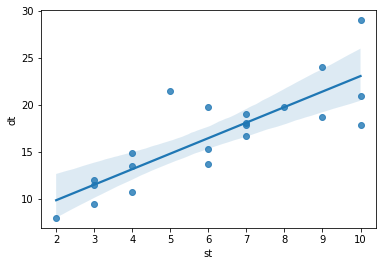

In [ ]:
sns.regplot(x='st', y='dt', data=df)

In [ ]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [ ]:
#R square
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predicting For new Data

In [ ]:
new_data = pd.Series([2,3,5,11,20])

In [ ]:
df_pred = pd.DataFrame(new_data, columns=['st'])

In [ ]:
model.predict(df_pred)

0     9.880774
1    11.529794
2    14.827833
3    24.721953
4    39.563132
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        13:03:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#residual analysis
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

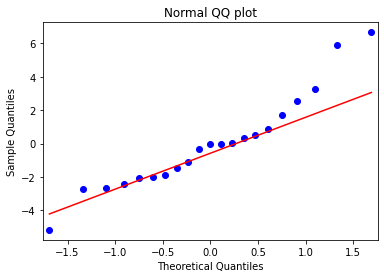

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal QQ plot')
plt.show()

**Observation** > Their are some predicted values which are differnts from actual values

# Log Transformation

In [ ]:
#Log transformation on input variabel
X_log = np.log(df['st'])

In [ ]:
#Building the model
model1=smf.ols('dt~X_log', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        13:09:31   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
X_log          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Log transformation with output variable
Y_log=np.log(df['dt']) 

In [ ]:
#Building model
model2=smf.ols('Y_log~st', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                        13:12:42   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.predict(df_pred)

0    2.332475
1    2.438027
2    2.649130
3    3.282439
4    4.232404
dtype: float64

# Building Final model after log transformation

In [ ]:
model4=smf.ols('Y_log~X_log', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.60e-07
Time:                        13:17:55   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
X_log          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion 
- As our model performane incress after log transformation
- Our p-value is < than significant value
- R-sq value is 77.2%
- AdjR-sq ==0.760